# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow
import cv2
import h5py

import tensorflow as tf
import tensorflow_addons as tfa
import tensorflow.keras.layers as layer

import os
import shutil
import glob

print("Imports complete")

Imports complete


## Loading the data
### Transfer all the images to a folder

In [2]:
!mkdir /tmp/test_data

In [3]:
!cp -R "../input/chest-xray-covid19-pneumonia/Data/train/COVID19" "/tmp/test_data/COVID"       

In [4]:
!cp -R "../input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA" "/tmp/test_data/VP"   

### Preaparing a TensorFlow Dataset

In [5]:
dir = "/tmp/test_data/"

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dir, labels = "inferred", label_mode = "int",
    color_mode = "rgb", batch_size = 32, image_size = (224, 224), 
    shuffle = True, seed = 42, subset = None, interpolation = "bicubic")

Found 1315 files belonging to 2 classes.


2022-02-01 08:12:52.199602: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-01 08:12:52.304228: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-01 08:12:52.305067: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-01 08:12:52.307626: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [6]:
class_names = test_ds.class_names
print(class_names)

['COVID', 'VP']


In [7]:
test_ds = test_ds.map(lambda x, y : (x, tf.one_hot(y, depth = 2)))

We create two numpy arrays
- `cx` : containing all the **COVID19** scans
- `vx` : containing all the **Pneumonia** scans

In [8]:
cx = np.array([cv2.resize(cv2.imread(i), (224,224), interpolation = cv2.INTER_CUBIC)
              for i in glob.glob('/tmp/test_data/COVID/*.jpg')])

vx = np.array([cv2.resize(cv2.imread(i), (224,224), interpolation = cv2.INTER_CUBIC)
              for i in glob.glob('/tmp/test_data/VP/*.jpg')])

In [9]:
print(cx.shape,vx.shape)

(460, 224, 224, 3) (855, 224, 224, 3)


# Loading in the Trained Models

In [10]:
dir = '../input/minor-project-sem-3/'

## AlexNet

In [11]:
AlexNet = tf.keras.models.load_model(dir+'AlexNet_model.h5')
#AlexNet.summary()

## ResNet

In [12]:
ResNet = tf.keras.models.load_model(dir+'ResNet_model.h5')
#ResNet.summary()

## VGG16

In [13]:
VGG16 = tf.keras.models.load_model(dir+'VGG16_model.h5')
#VGG16.summary()

## Inception Net

In [14]:
Inc = tf.keras.models.load_model(dir+'InceptionNet_model.h5')
#Inc.summary()

## MobileNet V2

In [15]:
Mob = tf.keras.models.load_model(dir+'MobileNet_model.h5')
#Mob.summary()

## U-Net

In [16]:
Unet = tf.keras.models.load_model(dir+'UNet.h5')
#Unet.summary()

# Testing the models

## AlexNet

In [17]:
Al, Aa, Af, Ap, Ar = AlexNet.evaluate(test_ds, verbose=1)

2022-02-01 08:13:41.332051: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-02-01 08:13:45.530222: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


42/42 [==============================] - 20s 243ms/step - loss: 0.0361 - accuracy: 0.9939 - f1_score: 0.9933 - precision: 0.9939 - recall: 0.9939


### Predicting on **COVID19** scans

Prediction on COVID-19 scans
This image most likely belongs to COVID with a 73.11 percent confidence.
This image most likely belongs to COVID with a 73.11 percent confidence.
This image most likely belongs to COVID with a 73.11 percent confidence.
This image most likely belongs to COVID with a 73.11 percent confidence.
This image most likely belongs to COVID with a 73.01 percent confidence.
This image most likely belongs to COVID with a 73.11 percent confidence.
This image most likely belongs to COVID with a 73.11 percent confidence.
This image most likely belongs to COVID with a 73.11 percent confidence.
This image most likely belongs to COVID with a 73.11 percent confidence.


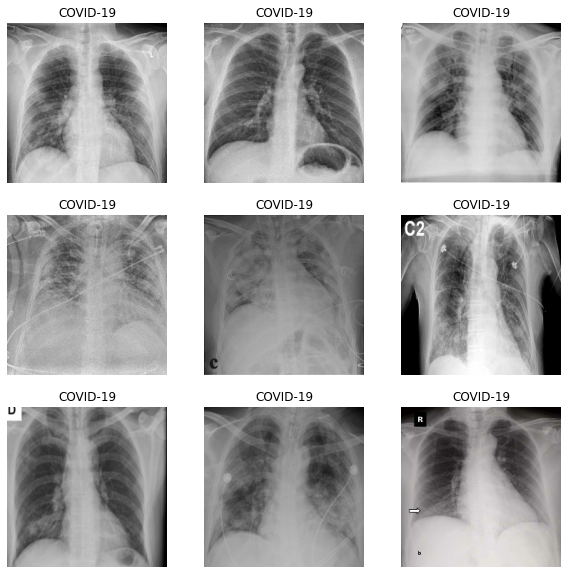

In [18]:
print("Prediction on COVID-19 scans")

plt.figure(figsize=(10, 10))

APredictions = AlexNet.predict(cx[:9])

for i in range(9):
    score = tf.nn.softmax(APredictions[i])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(cx[i])
    plt.title("COVID-19")
    print("This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score)))
    plt.axis("off")

### Predicting on **Pneumonia** scans

Prediction on Pneumonia scans
This image most likely belongs to VP with a 73.10 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.09 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.10 percent confidence.
This image most likely belongs to VP with a 72.99 percent confidence.
This image most likely belongs to VP with a 73.10 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.


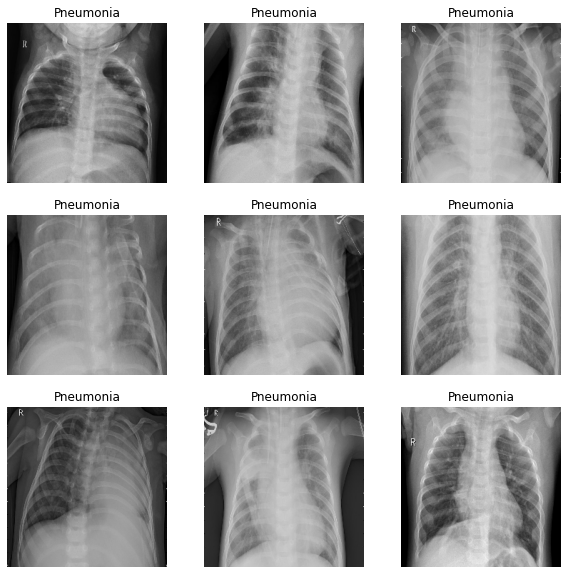

In [19]:
print("Prediction on Pneumonia scans")

plt.figure(figsize=(10, 10))

APredictions = AlexNet.predict(vx[:9])

for i in range(9):
    score = tf.nn.softmax(APredictions[i])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(vx[i])
    plt.title("Pneumonia")
    print("This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score)))
    plt.axis("off")

## ResNet

In [20]:
Rl, Ra, Rf, Rp, Rr = ResNet.evaluate(test_ds, verbose=1)

42/42 [==============================] - 16s 296ms/step - loss: 0.6729 - accuracy: 0.9962 - f1_score: 0.9958 - precision_1: 0.9962 - recall_1: 0.9962


### Predicting on **COVID19** scans

Prediction on COVID-19 scans
This image most likely belongs to COVID with a 73.10 percent confidence.
This image most likely belongs to COVID with a 73.11 percent confidence.
This image most likely belongs to COVID with a 73.11 percent confidence.
This image most likely belongs to COVID with a 73.11 percent confidence.
This image most likely belongs to COVID with a 73.11 percent confidence.
This image most likely belongs to COVID with a 73.10 percent confidence.
This image most likely belongs to COVID with a 73.00 percent confidence.
This image most likely belongs to COVID with a 73.10 percent confidence.
This image most likely belongs to COVID with a 73.11 percent confidence.


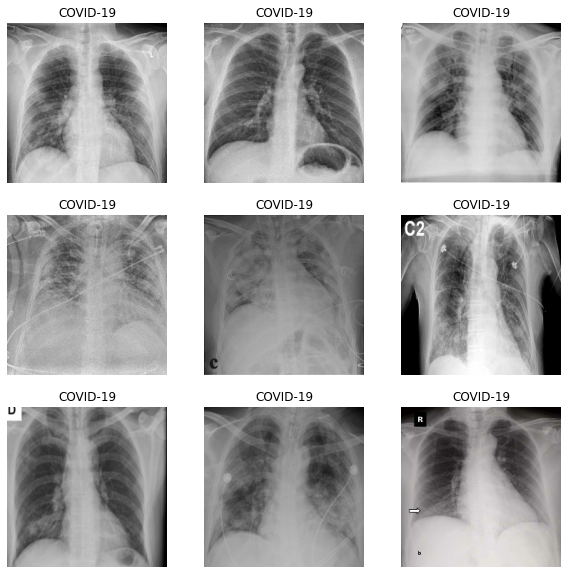

In [21]:
print("Prediction on COVID-19 scans")

plt.figure(figsize=(10, 10))

RPredictions = ResNet.predict(cx[:9])

for i in range(9):
    score = tf.nn.softmax(RPredictions[i])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(cx[i])
    plt.title("COVID-19")
    print("This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score)))
    plt.axis("off")

### Predicting on **Pneumonia** scans

Prediction on Pneumonia scans
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.


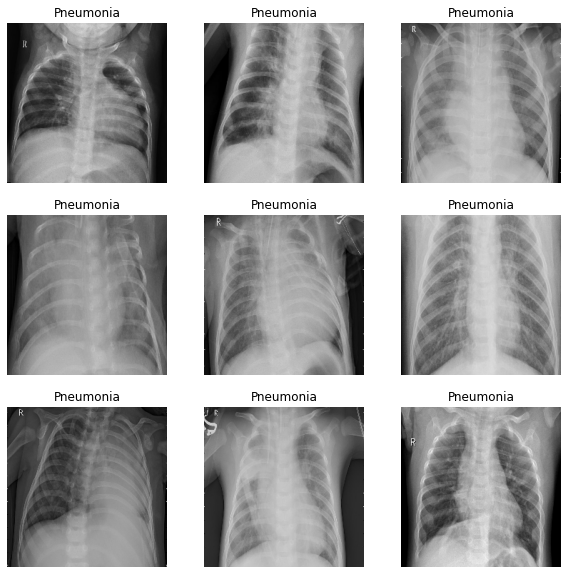

In [22]:
print("Prediction on Pneumonia scans")

plt.figure(figsize=(10, 10))

RPredictions = ResNet.predict(vx[:9])

for i in range(9):
    score = tf.nn.softmax(RPredictions[i])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(vx[i])
    plt.title("Pneumonia")
    print("This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score)))
    plt.axis("off")

## VGG16

In [23]:
Vl, Va, Vf, Vp, Vr = VGG16.evaluate(test_ds, verbose=1)

42/42 [==============================] - 17s 284ms/step - loss: 0.2259 - accuracy: 0.9749 - f1_score: 0.9721 - precision_2: 0.9749 - recall_2: 0.9749


### Predicting on **COVID19** scans

Prediction on COVID-19 scans
This image most likely belongs to COVID with a 67.74 percent confidence.
This image most likely belongs to COVID with a 73.07 percent confidence.
This image most likely belongs to COVID with a 67.72 percent confidence.
This image most likely belongs to COVID with a 73.09 percent confidence.
This image most likely belongs to COVID with a 72.88 percent confidence.
This image most likely belongs to COVID with a 61.29 percent confidence.
This image most likely belongs to VP with a 60.59 percent confidence.
This image most likely belongs to COVID with a 73.09 percent confidence.
This image most likely belongs to COVID with a 73.04 percent confidence.


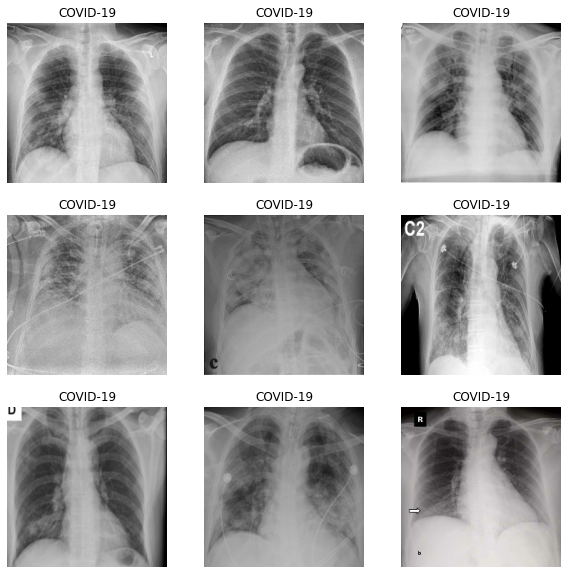

In [24]:
print("Prediction on COVID-19 scans")

plt.figure(figsize=(10, 10))

VPredictions = VGG16.predict(cx[:9])

for i in range(9):
    score = tf.nn.softmax(VPredictions[i])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(cx[i])
    plt.title("COVID-19")
    print("This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score)))
    plt.axis("off")

### Predicting on **Pneumonia** scans

Prediction on Pneumonia scans
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.10 percent confidence.
This image most likely belongs to VP with a 73.04 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.


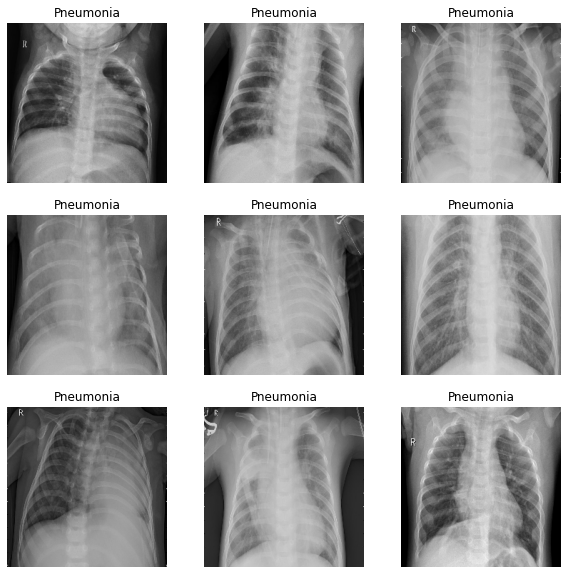

In [25]:
print("Prediction on Pneumonia scans")

plt.figure(figsize=(10, 10))

VPredictions = VGG16.predict(vx[:9])

for i in range(9):
    score = tf.nn.softmax(VPredictions[i])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(vx[i])
    plt.title("Pneumonia")
    print("This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score)))
    plt.axis("off")

## InceptionNet

In [26]:
Il, Ia, If, Ip, Ir = Inc.evaluate(test_ds, verbose=1)

42/42 [==============================] - 15s 268ms/step - loss: 0.4804 - accuracy: 0.9909 - f1_score: 0.9900 - precision_3: 0.9909 - recall_3: 0.9909


### Predicting on **COVID19** scans

Prediction on COVID-19 scans
This image most likely belongs to COVID with a 73.10 percent confidence.
This image most likely belongs to COVID with a 73.10 percent confidence.
This image most likely belongs to COVID with a 73.10 percent confidence.
This image most likely belongs to COVID with a 73.11 percent confidence.
This image most likely belongs to COVID with a 73.09 percent confidence.
This image most likely belongs to COVID with a 73.10 percent confidence.
This image most likely belongs to COVID with a 73.11 percent confidence.
This image most likely belongs to COVID with a 73.11 percent confidence.
This image most likely belongs to COVID with a 73.10 percent confidence.


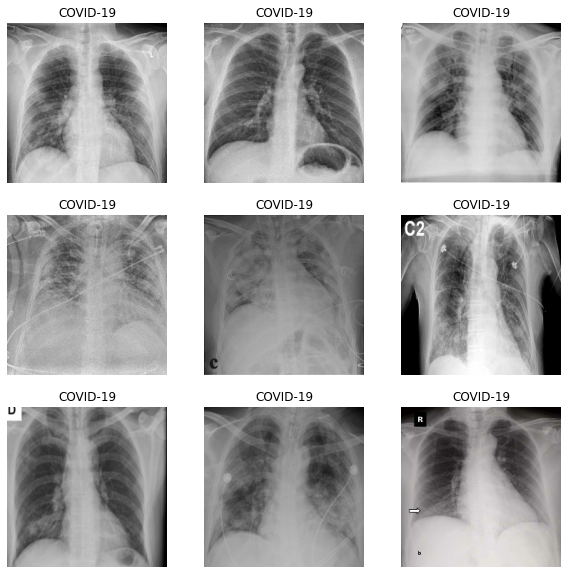

In [27]:
print("Prediction on COVID-19 scans")

plt.figure(figsize=(10, 10))

IPredictions = Inc.predict(cx[:9])

for i in range(9):
    score = tf.nn.softmax(IPredictions[i])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(cx[i])
    plt.title("COVID-19")
    print("This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score)))
    plt.axis("off")

### Predicting on **Pneumonia** scans

Prediction on Pneumonia scans
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.


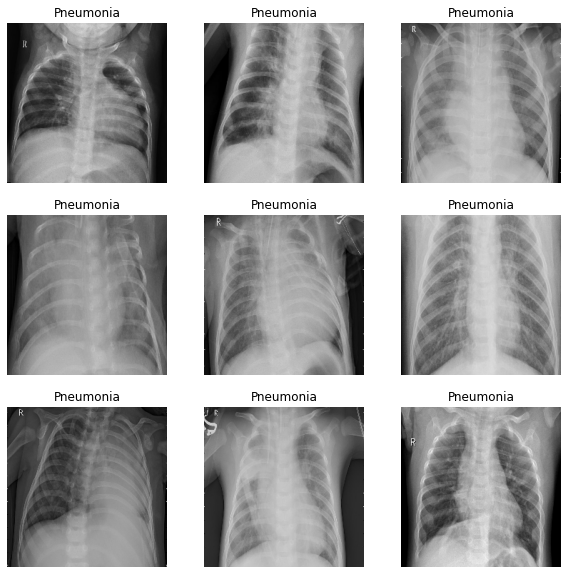

In [28]:
print("Prediction on Pneumonia scans")

plt.figure(figsize=(10, 10))

IPredictions = Inc.predict(vx[:9])

for i in range(9):
    score = tf.nn.softmax(IPredictions[i])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(vx[i])
    plt.title("Pneumonia")
    print("This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score)))
    plt.axis("off")

## MobileNet

In [29]:
Ml, Ma, Mf, Mp, Mr = Mob.evaluate(test_ds, verbose=1)

42/42 [==============================] - 15s 270ms/step - loss: 0.7571 - accuracy: 0.6829 - f1_score: 0.6826 - precision_4: 0.6829 - recall_4: 0.6829


### Predicting on **COVID19** scans

Prediction on COVID-19 scans
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.


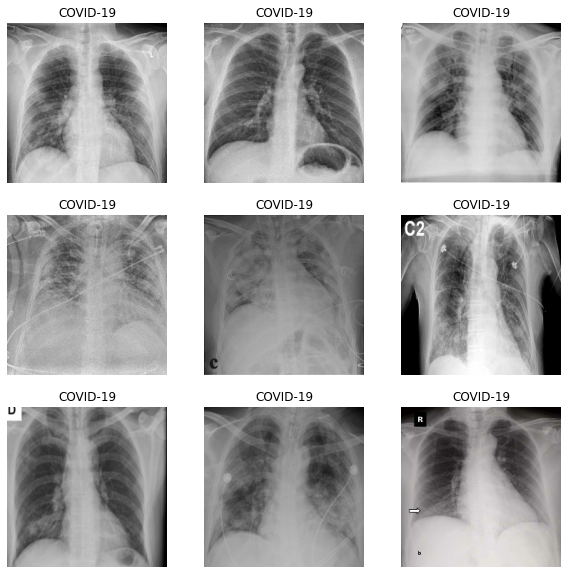

In [30]:
print("Prediction on COVID-19 scans")

plt.figure(figsize=(10, 10))

MPredictions = Mob.predict(cx[:9])

for i in range(9):
    score = tf.nn.softmax(IPredictions[i])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(cx[i])
    plt.title("COVID-19")
    print("This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score)))
    plt.axis("off")

### Predicting on **Pneumonia** scans

Prediction on Pneumonia scans
This image most likely belongs to COVID with a 72.05 percent confidence.
This image most likely belongs to VP with a 71.57 percent confidence.
This image most likely belongs to VP with a 54.17 percent confidence.
This image most likely belongs to VP with a 69.79 percent confidence.
This image most likely belongs to COVID with a 66.37 percent confidence.
This image most likely belongs to VP with a 65.18 percent confidence.
This image most likely belongs to COVID with a 72.39 percent confidence.
This image most likely belongs to VP with a 55.10 percent confidence.
This image most likely belongs to VP with a 60.89 percent confidence.


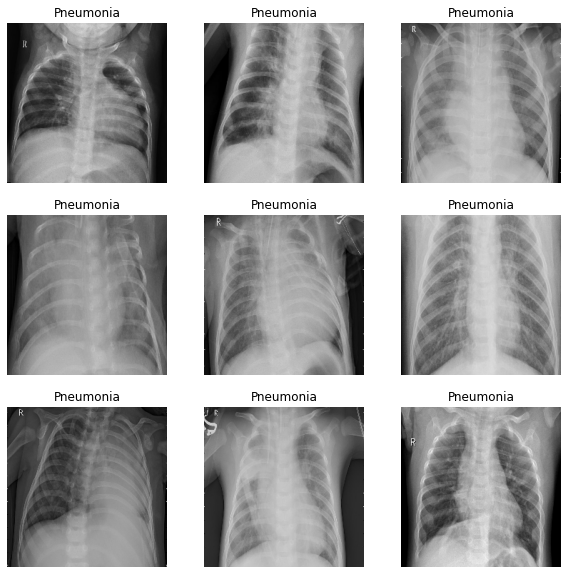

In [31]:
print("Prediction on Pneumonia scans")

plt.figure(figsize=(10, 10))

MPredictions = Mob.predict(vx[:9])

for i in range(9):
    score = tf.nn.softmax(MPredictions[i])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(vx[i])
    plt.title("Pneumonia")
    print("This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score)))
    plt.axis("off")

## U-Net

In [32]:
Ul, Ua, Uf, Up, Ur = Unet.evaluate(test_ds, verbose=1)

42/42 [==============================] - 16s 285ms/step - loss: 0.3090 - accuracy: 0.9612 - f1_score: 0.9578 - precision: 0.9612 - recall: 0.9612


### Predicting on **COVID19** scans

Prediction on COVID-19 scans
This image most likely belongs to COVID with a 73.07 percent confidence.
This image most likely belongs to COVID with a 73.08 percent confidence.
This image most likely belongs to COVID with a 73.07 percent confidence.
This image most likely belongs to COVID with a 73.10 percent confidence.
This image most likely belongs to COVID with a 73.07 percent confidence.
This image most likely belongs to VP with a 73.05 percent confidence.
This image most likely belongs to COVID with a 73.09 percent confidence.
This image most likely belongs to COVID with a 73.07 percent confidence.
This image most likely belongs to COVID with a 73.10 percent confidence.


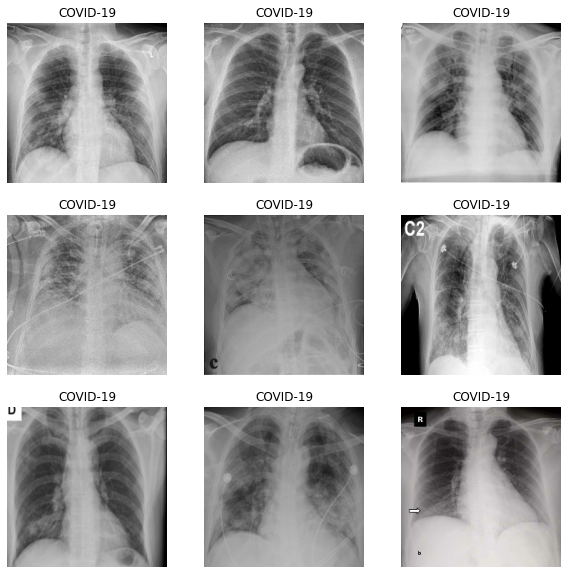

In [33]:
print("Prediction on COVID-19 scans")

plt.figure(figsize=(10, 10))

UPredictions = Unet.predict(cx[:9])

for i in range(9):
    score = tf.nn.softmax(UPredictions[i])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(cx[i])
    plt.title("COVID-19")
    print("This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score)))
    plt.axis("off")

### Predicting on **Pneumonia** scans

Prediction on Pneumonia scans
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.10 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 71.27 percent confidence.
This image most likely belongs to VP with a 64.21 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.
This image most likely belongs to VP with a 73.11 percent confidence.


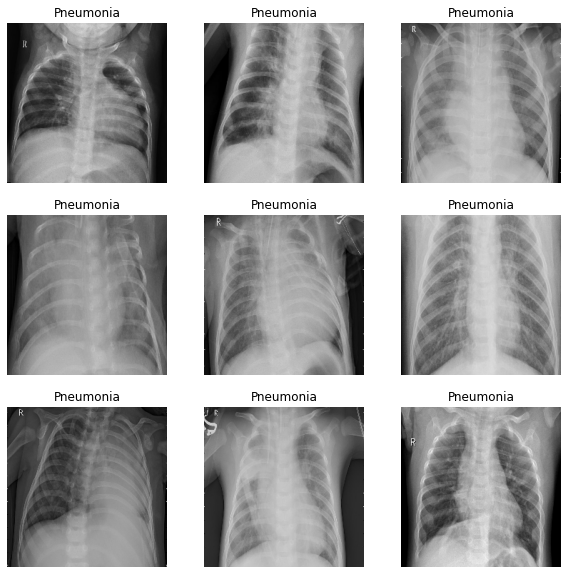

In [34]:
print("Prediction on Pneumonia scans")

plt.figure(figsize=(10, 10))

UPredictions = Unet.predict(vx[:9])

for i in range(9):
    score = tf.nn.softmax(UPredictions[i])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(vx[i])
    plt.title("Pneumonia")
    print("This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score)))
    plt.axis("off")